<a href="https://colab.research.google.com/github/AimasNana/gisproject/blob/main/GIS_Programming_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
UNIVERSITE COTE D'AZUR


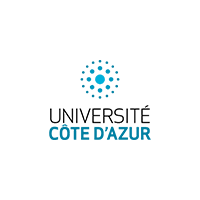



#**INVESTGATING WILDFIRES USING SAR: CASE STUDY - AUDE, FRANCE.**

                           
Department of Environmental Hazards and Risks Management
                
AIURSK14: GIS PROGRAMMING

Mannoni Pierre-Alain


December 10,2025

</center>

# **1.0 ABSTRACT**

---


The total hectares of area of interest was 243,873.66, and the total hectares of land damaged as a result of the fire was (5,955.96), the AOI has coordinate (latitude 42.9939 longitude 2.6708) with a 28km buffer. The objective of the research was to determine the extent of the Aude fire and delineate burn severity that occured August 2025. The satellite data used was sentinel-1 and sentinel-2 (aeriel view and false colour composite). The analysis was done by exploring vertical transmit vertical received (VV)and vertical transmit horizontal recieved(VH). The radar burn index captured the variation in structural changes and surface changes by using VV and VH difference, this increased the accuracy of the burned severity map, especially because the terrain is a mixed landscape, as a result the fire parameter is know and the vegetation damaged ascertiain.


# **2.0 INTRODUCTION**


---

<div style="text-align: justify;">
In recent decades, Europe has experienced an alarming rise in the frequency, intensity, and duration of wildfires, a trend increasingly attributed to the growing influence of climate change. Once confined primarily to the Mediterranean region, destructive fires are now spreading northward and occurring in areas traditionally considered low-risk, such as Central and Northern Europe. This shift reflects the changing climate dynamics across the continent with longer and hotter summers, prolonged droughts, declining soil moisture, and more frequent heatwaves are creating conditions highly conducive to ignition and rapid fire spread.

Scientific evidence shows that Europe's average summer temperatures have increased at twice the global rate, amplifying the risk of “mega-fires” that are larger, more severe, and harder to control than those of previous decades. These climatic changes interact with other human and environmental factors including land abandonment, forest densification, and fuel accumulation, resulting in complex fire regimes that threaten ecosystems, economies, and human lives. The combination of climate-driven weather extremes and socio-ecological vulnerability has transformed wildfires from seasonal natural events into a major environmental and public safety crisis across Europe.
</div>




  ## 2.1 CASE STUDY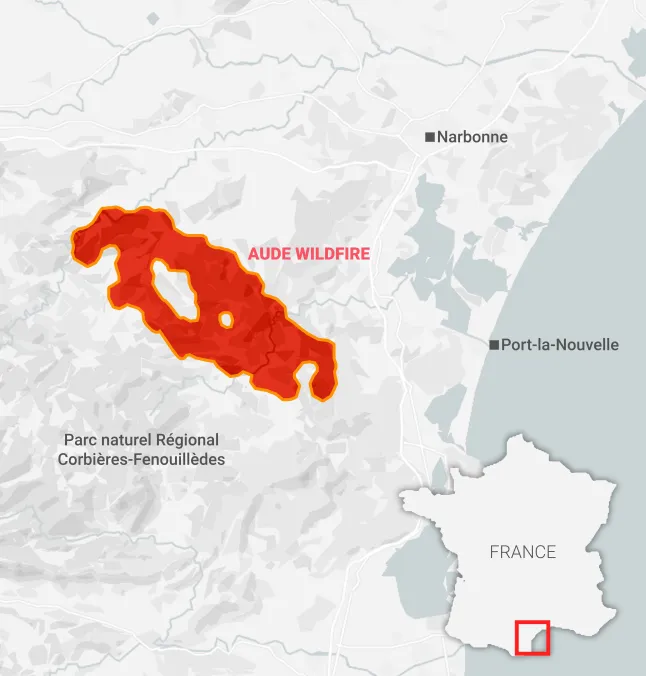

The Aude wildfire in southern France is France's largest wildfire after 75 years, this shows how climate change, topography, and land-use patterns combine to create extreme fire behavior. Its severity was fueled by record heat, prolonged drought, and declining soil moisture, consistent with Europe's warming trend. Abandoned vineyards and unmanaged shrubland removed natural firebreaks, enabling rapid spread.

The Corbières massif's steep slopes and wind-funneling valleys accelerated fire movement, while thin limestone soils supported highly combustible garrigue vegetation, Cooler weather eventually aided containment, though hotspots lingered.

The fire caused fatalities, injuries, destruction of homes, forests, and farmland, and severe losses to the wine industry. Ecologically, Mediterranean forests and shrublands were devastated, increasing erosion and flood risks.

This event underscores southern Europe's growing vulnerability to climate-driven megafires and the urgent need for integrated fire management, early-warning systems, and adaptive land-use planning.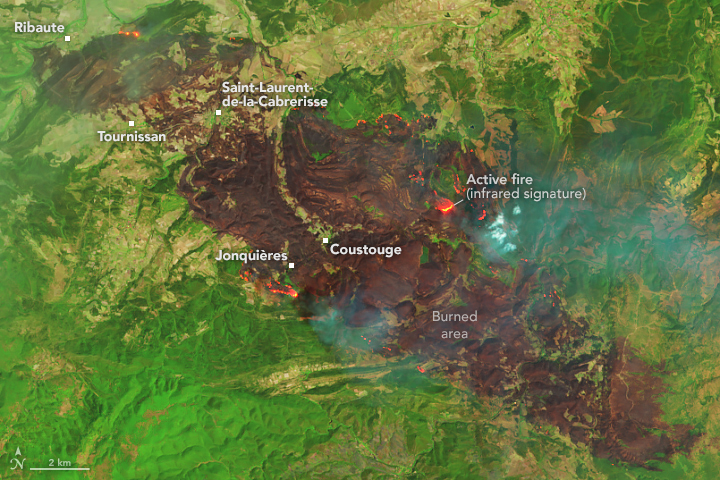



---
 **OBJECTIVES**
1.  Determine change in surface structure.
2.   calculate the total area burnt.
3.   Classify the extend of burn.







# **3.0 METHOD AND METHODOLOGY**

---

This methods section describes a reproducible, state-of-the-art geographic information system (GIS) workflow that integrates Sentinel-1 SAR and Sentinel-2 optical imagery to  

*   Delineate the fire parameters.
*   Map burn severity.
*   Quantify impacted area.

 The approach combines complementary strengths of SAR (all-weather, day/night, sensitivity to structure, surface and moisture) and optical sensors(aerial view and false colour).
Mapping and assessing the Aude (Corbières) wildfire using Sentinel-1 (SAR) and Sentinel-2 (optical).






























##**3.1 PRESENTATION OF TOOLS AND LIBRARIES**

The Libraries Used for Aude Wildfire Analysis includes:


*   ee (Google Earth Engine Python API).
*   geemap (A Python package for interactive mapping with Google Earth Engine).
*   folium (Used for creating interactive maps, often installed with geemap).
*  geopandas (For working with geospatial data).
*   shapely (For geometric objects and operations, often a dependency of geopandas).
*   rasterio (For reading and writing raster datasets)
sentinelsat (For searching and downloading Sentinel satellite products)
*  matplotlib (For creating static, interactive, and animated visualizations in Python).
*   cartopy (For cartographic projections and drawing maps, often used with matplotlib).
*   pandas (For data manipulation and analysis)
seaborn (For statistical data visualization, built on matplotlib).

##  **3.2  MAPPING USING SENTINEL 1 (SAR)**
 Sentinel-1 collects C-band synthetic aperture radar (SAR) imagery at a variety of polarizations and resolutions. Since radar data requires several specialized algorithms to obtain calibrated, orthorectified imagery, this document describes pre-processing of Sentinel-1 data in Earth Engine

Sentinel-1 data is collected with several different instrument configurations, resolutions, band combinations during both ascending and descending orbits. Because of this heterogeneity, it's usually necessary to filter the data down to a homogeneous subset before starting processing.
The dataset used in this process include:


1.   Metadata and Filtering: To create a homogeneous subset of Sentinel-1 data, it will usually be necessary to filter the collection using metadata properties. The common metadata fields used for filtering include these properties:

*   transmitterReceiverPolarisation: ['VV', 'VH']
*  instrumentMode: 'IW' (Interferometric Wide Swath), 'EW' (Extra Wide Swath) or 'SM' (Strip Map)

*   orbitProperties_pass: 'DESCENDING'
*  resolution_meters: 10m.
*   resolution: 'M' (medium) or 'H' (high).

2.   Sentinel-1 Preprocessing: Imagery in the Earth Engine 'COPERNICUS/S1_GRD' Sentinel-1 ImageCollection is consists of Level-1 Ground Range Detected (GRD) scenes processed to backscatter coefficient (σ°) in decibels (dB). The backscatter coefficient represents target backscattering area (radar cross-section) per unit ground area. Because it can vary by several orders of magnitude, it is converted to dB as 10*log10σ°(log scaling). It measures whether the radiated terrain scatters the incident microwave radiation preferentially away from the SAR sensor dB < 0 or towards the SAR sensor dB > 0. This scattering behavior depends on the physical characteristics of the terrain, primarily the geometry of the terrain elements and their electromagnetic characteristics.

3.  temporal resolution: 6 days


##**3.3 MAPPING USING SENTINEL 2**

Sentinel-2 is a wide-swath, high-resolution, multi-spectral imaging mission supporting Copernicus Land Monitoring studies, including the monitoring of vegetation, soil and water cover, as well as observation of inland waterways and coastal areas. it has a revisiting time of 5 days and this enables constant availability of satellite image over a location.
Sentinel - 2 has 12- bands with differnt ranging pixel size from (10,20,60), a precise SCL class table to classify landcovers with right appropriate colour.

## **3.4 PRINCIPLE OF APPLIED METHOD**

TEMPORAL COMPOSITE:
To improve wildfire impact assessment, temporal compositing was applied to pre- and post-fire Sentinel-1 SAR datasets. This technique aggregates multiple acquisitions within a defined period to create composite images that reduce speckle noise and transient anomalies common in radar data. Seventeen (17) pre-fire and twenty-three (23) post-fire images were combined using median or mean operations, emphasizing stable surface features while minimizing atmospheric and sensor variability. This process enhances image clarity and significantly improves change detection and burned area mapping, ensuring a more accurate and temporally consistent evaluation of wildfire effects.

CHANGE DETECTION: Change detection is a critical technique for quantifying landscape alterations following environmental disturbances such as wildfires. In this study, we employed a synergistic approach combining Sentinel-1 Synthetic Aperture Radar (SAR). SAR-based analysis utilized pre- and post-fire temporal composites derived from multiple acquisitions, applying log-scaled ratio transformations to backscatter values to detect structural modifications. These changes correspond to key wildfire impacts, including increased surface roughness, vegetation loss, and reduced soil moisture, as documented in prior studies (Filipponi, 2019) and (Tanase et al., 2015).


AFFECTED AREA EXTRACTION: The extraction of affected areas represents a critical phase in remote sensing-based disaster assessment, aimed at isolating and quantifying regions that have undergone significant change due to the environmental event. Following the change detection process, pixels are classified into “burned” and “unburned” categories by applying carefully selected thresholds to the computed change metrics such as SAR backscatter differences. These thresholds are determined based on empirical observations, statistical analysis, or reference data, ensuring that the classification reflects meaningful physical or ecological transformations.
To refine the accuracy of the extracted areas, spatial masks are employed to exclude non-relevant zones such as permanent water bodies, This step prevents misclassification and enhances thematic consistency.

CODE USE: The computational workflow combined publicly available scripts with AI-assisted refinement. Core routines for accessing and processing Sentinel-1 SAR and Sentinel-2 imagery were adapted from Google Earth Engine (GEE) examples, covering image collection, filtering, compositing, and index calculation. These scripts were extensively customized to support wildfire analysis, integrating temporal compositing, SAR-based change detection (e.g., log-ratio), threshold classification, spatial masking, and morphological filtering for burned area extraction. Code optimization and structuring were assisted by Microsoft Copilot, while Google Gemini supported algorithm validation. All external sources were cited to ensure transparency and reproducibility. The final implementation reflects a hybrid approach leveraging authoritative resources, AI-driven programming, and domain-specific customization for a robust, scalable remote sensing workflow.

# **package installation**

In [ ]:
pip install folium geopandas shapely rasterio sentinelsat matplotlib cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.3 MB/s eta 0:00:00


# **4.0 RESULT**

---



 **USING SENTINEL-2**

This study area extend was defined using google earth pro, to ascertain the coordinate and  buffer radius of 28km. Sentinel-2 was used to generate the pre- and post-fire RGB composites, the aerial view highlighted surface conditions. The visualizations were built upon course-provided Earth Engine code adapted from official GEE tutorials.

The are of interest was defined with coordinate(latitude 42.9939,longitude 2.6708) and a specific radius of 28km for buffer around the area of study.



Figure 4.1:  Composite image of Aude pre fire event

In [ ]:
import ee
import geemap

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nana-477607')

# AOI
aoi_center = ee.Geometry.Point([2.6708, 42.9939])  # Aude fire coordinates
aoi = aoi_center.buffer(28000)  # 28 km radius

# Date ranges
pre_fire_start = '2025-06-01'
pre_fire_end = '2025-08-03'

# Cloud masking function
def mask_s2_clouds(image):
    qa = image.select('QA60')
    cloud_bit_mask = 1 << 10
    cirrus_bit_mask = 1 << 11
    mask = (
        qa.bitwiseAnd(cloud_bit_mask).eq(0)
        .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
    )
    return image.updateMask(mask).divide(10000)

# Pre-fire dataset
dataset_pre_fire = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(aoi)
    .filterDate(pre_fire_start, pre_fire_end)
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
    .map(mask_s2_clouds)
)


# Visualization parameters
rgb_vis = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B4', 'B3', 'B2'],  # RGB
}

# AOI outline
aoi_outline = ee.FeatureCollection([ee.Feature(aoi)]).style(
    color='red',
    fillColor='00000000',
    width=2
)

# Create interactive map
m = geemap.Map(center=[42.9939, 2.6708], zoom=10)

# Add layers
m.addLayer(dataset_pre_fire.mean(), rgb_vis, 'Sentinel-2 Pre-Fire (Jun-Aug)')
m.addLayer(aoi_outline, {}, 'AOI Outline')

# Print image counts
num_pre_fire_images = dataset_pre_fire.size().getInfo()
print(f"Number of pre-fire images: {num_pre_fire_images}")

# Add layer control
m.addLayerControl()

# Display map
m

Number of pre-fire images: 17


Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

Figure 4.2:  Composite image of Aude post fire event

In [ ]:
import ee
import geemap

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nana-477607')

# AOI
aoi_center = ee.Geometry.Point([2.6708, 42.9939])  # Aude fire coordinates
aoi = aoi_center.buffer(28000)  # 28 km radius

# Date ranges
post_fire_start = '2025-08-10'
post_fire_end = '2025-11-03'

# Cloud masking function
def mask_s2_clouds(image):
    qa = image.select('QA60')
    cloud_bit_mask = 1 << 10
    cirrus_bit_mask = 1 << 11
    mask = (
        qa.bitwiseAnd(cloud_bit_mask).eq(0)
        .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
    )
    return image.updateMask(mask).divide(10000)

# Post-fire dataset
dataset_post_fire = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(aoi)
    .filterDate(post_fire_start, post_fire_end)
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
    .map(mask_s2_clouds)
)

# Visualization parameters
rgb_vis = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B4', 'B3', 'B2'],  # RGB
}

# AOI outline
aoi_outline = ee.FeatureCollection([ee.Feature(aoi)]).style(
    color='red',
    fillColor='00000000',
    width=2
)

# Create interactive map
m = geemap.Map(center=[42.9939, 2.6708], zoom=10)

# Add layers
m.addLayer(dataset_post_fire.mean(), rgb_vis, 'Sentinel-2 Post-Fire (Aug-Nov)')
m.addLayer(aoi_outline, {}, 'AOI Outline')

# Print image counts
num_post_fire_images = dataset_post_fire.size().getInfo()
print(f"Number of post-fire images: {num_post_fire_images}")

# Add layer control
m.addLayerControl()

# Display map
m

Number of post-fire images: 23


Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

##**4.1 FALSE COLOUR**
False color analysis with optical sensors was used to visualize information beyond what the human eye can see by assigning artificial colors to different spectral bands. This technique enhanced contrast between features like vegetation, water, and soil, making them easier to distinguish. Hidden details such as plant health or moisture content by incorporating infrared and other non-visible wavelengths.

The fire ignited near the small rural commune of Ribaute, within a landscape of rugged limestone hills, narrow valleys, and extensive Mediterranean scrubland (garrigue) interspersed with pine stands, vineyards, and olive groves, false colour was used to intensify the vegetation health of before and after the event.

Figure 4.3: Interactive map of false colour

In [ ]:

import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nana-477607')

# Define AOI
center = ee.Geometry.Point([2.6708, 42.9939])
aoi = center.buffer(28000)

# Define date ranges
pre_fire_start = '2025-06-01'
pre_fire_end = '2025-08-03' # Just before the fire
post_fire_start = '2025-08-10' # Shortly after the fire
post_fire_end = '2025-11-03' # End of monitoring period

# Cloud masking function for Sentinel-2
def mask_s2_clouds(image):
    qa = image.select('QA60')
    cloud_bit_mask = 1 << 10
    cirrus_bit_mask = 1 << 11
    mask = qa.bitwiseAnd(cloud_bit_mask).eq(0).And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
    return image.updateMask(mask).divide(10000) # Scale bands to 0-1 range

# Load and filter Sentinel-2 data for pre-fire period
img_s2_pre_fire = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(aoi)
    .filterDate(pre_fire_start, pre_fire_end)
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) # Less than 10% cloudy
    .map(mask_s2_clouds)
    .mean()
    .clip(aoi)
)

# Load and filter Sentinel-2 data for post-fire period
img_s2_post_fire = (
    ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
    .filterBounds(aoi)
    .filterDate(post_fire_start, post_fire_end)
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10))
    .map(mask_s2_clouds)
    .mean()
    .clip(aoi)
)

# Visualization parameters for Sentinel-2 (False Color Infrared)
s2_vis_params = {
    'min': 0.0,
    'max': 0.3,
    'bands': ['B8', 'B4', 'B3'] # Near Infrared, Red, Green for False Color Infrared
}

# Create map and add layers
m2 = geemap.Map(center=[42.9939, 2.6708], zoom=10)
m2.addLayer(aoi, {'color': 'red'}, 'AUDE_AOI Outline')
m2.addLayer(img_s2_pre_fire, s2_vis_params, 'Sentinel-2 Pre-Fire (False Color)')
m2.addLayer(img_s2_post_fire, s2_vis_params, 'Sentinel-2 Post-Fire (False Color)')

m2.addLayerControl()
m2

Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

##**4.2 SENTINEL-1**

Sentinel-1 Synthetic Aperture Radar (SAR) imagery was employed to analyze the topographic structure and surface texture of the study area. This sensor was selected due to its capability to provide data acquisition independent of daylight and weather conditions, enabling continuous monitoring. SAR data offers critical insights into parameters such as soil moisture, fuel availability, and post-fire impact assessment.
For temporal analysis, Sentinel-1 descending pass data were utilized to generate pre-fire and post-fire burn compositions. The analysis was conducted using the VV (vertical transmit-vertical Receive) and VH (vertcal transmit- horizontal recieve)polarization mode, which is particularly effective for detecting structural changes in vegetation and surface conditions.
The following code demonstrates the implementation of an interactive map visualizing the descending pass data for the Aude wildfire, highlighting both pre-fire and post-fire conditions using VV and VH polarization.

Figure 4.4: Sentinel-1 showing pre and post fire structure deformation.


In [ ]:
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nana-477607')

# Define AOI: center point and 28 km radius
center = ee.Geometry.Point([2.6708, 42.9939])
aoi = center.buffer(28000)  # 28 km radius

# Define date ranges
pre_fire_start = '2025-06-01'
pre_fire_end = '2025-08-03'
post_fire_start = '2025-08-10'
post_fire_end = '2025-11-03'

# Function to get DESCENDING VV mean and clip to AOI
def get_desc_mean(start, end):
    return (ee.ImageCollection('COPERNICUS/S1_GRD')
            .filterBounds(aoi)
            .filterDate(start, end)
            .filter(ee.Filter.eq('instrumentMode', 'IW'))
            .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))
            .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))
            .select('VV')
            .mean()
            .clip(aoi))

# Get pre-fire and post-fire DESC composites
desc_pre_fire = get_desc_mean(pre_fire_start, pre_fire_end)
desc_post_fire = get_desc_mean(post_fire_start, post_fire_end)

# Create interactive map
m = geemap.Map(center=[42.9939, 2.6708], zoom=10)

# Add AOI outline
m.addLayer(aoi, {}, 'AOI (28 km radius)')

# Add DESC layers clipped to AOI
m.addLayer(desc_pre_fire, {'min': -25, 'max': 5}, 'DESC Pre-Fire VV (Clipped)')
m.addLayer(desc_post_fire, {'min': -25, 'max': 5}, 'DESC Post-Fire VV (Clipped)')

# Add layer control
m.addLayerControl()

# Display map
m

Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

## 4.2.1 VV Polarization

VV polarization refers to the vertical transmit-vertical receive configuration in Synthetic Aperture Radar (SAR). It is widely used in wildfire monitoring because of its sensitivity to surface conditions and ability to operate under all-weather conditions.
After a fire, vegetation canopy is significantly reduced, minimizing volume scattering and allowing VV polarization to provide clearer ground signals compared to cross-polarizations. It performs particularly well in open or sparse vegetation areas, which are common in wildfire-prone regions.  Overall, VV polarization is a critical SAR parameter for detecting surface changes caused by fire, making it an essential tool for accurate burned area detection and severity assessment as backscatter increase as surface roughnes increases with vegetation debri and burned terrain.  
For better visualization, image is enhanced by manipulating the stretch from custom to sigma 1, this is done for Pre-fire, post-fire and the difference.

 Figure 4.5: Sentinel-1 showing Pre, Post and Difference in VV polarization of AOI

In [ ]:
import geemap
import ee

ee.Authenticate()
ee.Initialize(project='nana-477607')

# AOI
center = ee.Geometry.Point([2.6708, 42.9939])
aoi = center.buffer(28000)

# Date ranges
pre_fire_start = '2025-06-01'
pre_fire_end = '2025-08-03'
post_fire_start = '2025-08-10'
post_fire_end = '2025-11-03'

# Function to get VV mean and clip
def get_vv_mean(start, end):
    return (ee.ImageCollection('COPERNICUS/S1_GRD')
            .filterBounds(aoi)
            .filterDate(start, end)
            .filter(ee.Filter.eq('instrumentMode', 'IW'))
            .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VV'))
            .filter(ee.Filter.eq('orbitProperties_pass', 'ASCENDING'))  # ASC only
            .select('VV')
            .mean()
            .clip(aoi))

# Pre-fire and Post-fire VV composites
vv_pre_fire = get_vv_mean(pre_fire_start, pre_fire_end)
vv_post_fire = get_vv_mean(post_fire_start, post_fire_end)

# Difference map
vv_diff = vv_post_fire.subtract(vv_pre_fire)

# Visualization parameters
vis_params = {'min': -25, 'max': 5, 'palette': ['blue', 'white', 'red']}

# Create interactive map
m = geemap.Map(center=[42.9939, 2.6708], zoom=10)
m.addLayer(aoi, {}, 'AOI')
m.addLayer(vv_pre_fire, vis_params, 'VV Pre-Fire (dB)')
m.addLayer(vv_post_fire, vis_params, 'VV Post-Fire (dB)')
m.addLayer(vv_diff, {'min': -5, 'max': 5, 'palette': ['blue', 'white', 'red']}, 'VV Difference')

# Add colorbar for dB values
m.add_colorbar(vis_params, label='Backscatter (dB)', orientation='horizontal')

# Add layer control
m.addLayerControl()

# Display map
m

# VV POLARIZATION

Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

## 4.2.2 VH Polarization

VH polarization, which transmits radar signals vertically and receives them horizontally, is widely used in wildfire monitoring due to its sensitivity to vegetation structure and volume scattering. Unlike VV, VH polarization interacts strongly with vegetation canopies, making it effective for detecting changes in biomass and structural loss after a fire. Burned areas exhibit a significant reduction in cross-polarized backscatter because the canopy is destroyed, which helps distinguish burned from unburned regions. VH is particularly useful for assessing burn severity in dense vegetation and is often combined with VV polarization to compute indices such as the Radar Burn Ratio (RBR) for improved classification accuracy. Overall, VH polarization provides complementary information to VV, enhancing the ability to monitor fire impacts on vegetation and landscape structure, this makes VH a strong indicator of vegetation loss and burn severity, the backscatter will be less and in the negative.

For better visualization, image is enhanced by manipulating the stretch from custom to sigma 1, this is done for Pre-fire, post-fire and the difference.

Figure 4.6: Sentinel-1 showing Pre, Post and Difference in VH polarization of AOI

In [ ]:
import geemap
import ee

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nana-477607')

# AOI
center = ee.Geometry.Point([2.6708, 42.9939])
aoi = center.buffer(28000)

# Date ranges
pre_fire_start = '2025-06-01'
pre_fire_end = '2025-08-03'
post_fire_start = '2025-08-10'
post_fire_end = '2025-11-03'

# Function to get VH mean (ASC + DESC) and clip
def get_vh_mean(start, end):
    return (ee.ImageCollection('COPERNICUS/S1_GRD')
            .filterBounds(aoi)
            .filterDate(start, end)
            .filter(ee.Filter.eq('instrumentMode', 'IW'))
            .filter(ee.Filter.listContains('transmitterReceiverPolarisation', 'VH'))
            .select('VH')
            .mean()
            .clip(aoi))

# Pre-fire and Post-fire VH composites
vh_pre_fire = get_vh_mean(pre_fire_start, pre_fire_end)
vh_post_fire = get_vh_mean(post_fire_start, post_fire_end)

# Difference map
vh_diff = vh_post_fire.subtract(vh_pre_fire)

# Visualization parameters for VH backscatter in dB
vis_params = {'min': -30, 'max': -5, 'palette': ['blue', 'white', 'red']}

# Create interactive map
m = geemap.Map(center=[42.9939, 2.6708], zoom=10)
m.addLayer(aoi, {}, 'AOI')
m.addLayer(vh_pre_fire, vis_params, 'VH Pre-Fire (dB)')
m.addLayer(vh_post_fire, vis_params, 'VH Post-Fire (dB)')
m.addLayer(vh_diff, {'min': -5, 'max': 5, 'palette': ['blue', 'white', 'red']}, 'VH Difference')

# Add colorbar for dB values
m.add_colorbar(vis_params, label='VH Backscatter (dB)', orientation='horizontal')

# Add layer control
m.addLayerControl()

# Display map
m


# VH POLARIZATION

Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

  ## 4.3 RADAR BURN INDEX


Radar Burn Index (RBI) in the Aude Wildfire Study Area
The Radar Burn Index (RBI) is a crucial metric for assessing wildfire impact, particularly in the rugged, Mediterranean-type landscape of the Aude region. By leveraging Sentinel-1's VV and VH polarizations (VV is often combined with VH polarization to compute indices such as the Radar Burn Ratio (RBR), combining them gives a more complete understanding of fire impact).

RBI provides unique insights into changes in vegetation structure and soil moisture caused by the fire.  Post-fire destruction of vegetation leads to a noticeable increase in  VV backscatter (surface is rough) and  with cross-polarization (VH backscatter) decrease being especially sensitive to the volume scattering of the lost biomass. By analyzing these pre- and post-fire differences through the RBI, we can effectively delineate the spatial extent of the burn and classify burn severity, which is vital for understanding ecological damage and planning recovery efforts in this vulnerable, climate-impacted area.

The classification was done using the USGS style of classification and fusing with the radar burn index to access the extent of burnt in hectares and the masking of the water bodies  to avaoid false calculation.

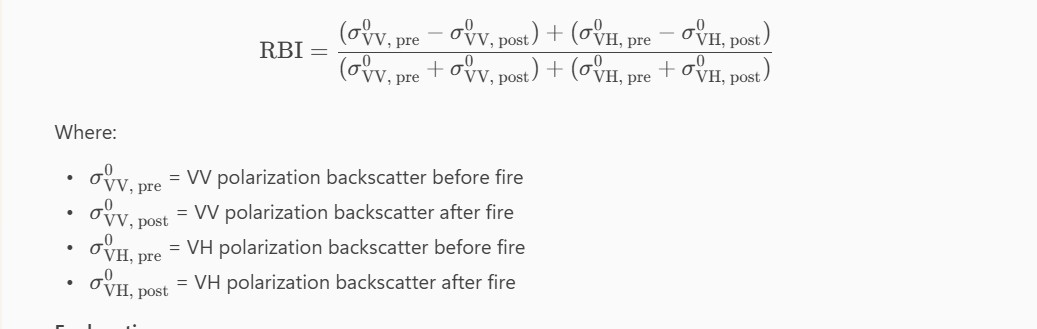

Figure 4.7: RBI classification.

In [ ]:
import ee
import geemap
import matplotlib.colors as mcolors

# Authenticate and initialize Earth Engine
ee.Authenticate()
ee.Initialize(project='nana-477607')

# AOI
center = ee.Geometry.Point([2.6708, 42.9939])
aoi = center.buffer(28000)

# Date ranges
pre_fire_start = '2025-06-01'
pre_fire_end = '2025-08-03'
post_fire_start = '2025-08-10'
post_fire_end = '2025-11-03'

# Load JRC Global Surface Water mask to avoid water bodies refered to as unburn
# Pixels with water occurrence > 0 will be 1, otherwise 0
water_mask = ee.Image('JRC/GSW1_4/GlobalSurfaceWater') \
    .select('occurrence') \
    .gt(0) \
    .clip(aoi)

# Function to get VV and VH mean composites. Masking will happen after RBI classification.
def get_s1_composite(start, end, aoi):
    composite = (
        ee.ImageCollection('COPERNICUS/S1_GRD')
        .filterBounds(aoi)
        .filterDate(start, end)
        .filter(ee.Filter.eq('instrumentMode', 'IW'))
        .filter(ee.Filter.eq('orbitProperties_pass', 'DESCENDING'))
        .select(['VV', 'VH'])
        .mean()
        .clip(aoi)
    )
    return composite

# Pre-fire and Post-fire composites (without initial water mask)
pre_fire_img = get_s1_composite(pre_fire_start, pre_fire_end, aoi)
post_fire_img = get_s1_composite(post_fire_start, post_fire_end, aoi)

# Compute RBI
rbi = (
    pre_fire_img.select('VV').subtract(post_fire_img.select('VV'))
    .divide(pre_fire_img.select('VV').add(post_fire_img.select('VV')))
    .add(pre_fire_img.select('VH').subtract(post_fire_img.select('VH'))
         .divide(pre_fire_img.select('VH').add(pre_fire_img.select('VH'))))
)

# USGS-style classification
unburned = rbi.lt(0.1)
low = rbi.gte(0.1).And(rbi.lt(0.27))
moderate = rbi.gte(0.27).And(rbi.lt(0.44))
high = rbi.gte(0.44)

# Combine into a single classified image
rbi_class = (
    unburned.multiply(1)       # Class 1: Unburned
    .add(low.multiply(2))      # Class 2: Low Severity
    .add(moderate.multiply(3)) # Class 3: Moderate Severity
    .add(high.multiply(4))     # Class 4: High Severity
)

# Now apply water mask: set water areas to a new class (e.g., 0)
rbi_class = rbi_class.where(water_mask.eq(1), 0).rename('RBI_Severity') # Class 0: Water

# Visualization for classes, including water
class_vis = {
    'min': 0, # Min class value is now 0 for water
    'max': 4,
    'palette': ['blue', 'green', 'yellow', 'orange', 'red']  # 0=Water, 1=Unburned, 4=High severity
}

# Convert color names to RGB tuples (0-255) for the legend
rgb_colors_for_legend = []
for color_name in class_vis['palette']:
    rgb_float = mcolors.to_rgb(color_name)
    rgb_int = tuple(int(c * 255) for c in rgb_float)
    rgb_colors_for_legend.append(rgb_int)

# Create interactive map
m_rbi_usgs = geemap.Map(center=[42.9939, 2.6708], zoom=10)
m_rbi_usgs.addLayer(aoi, {'color': 'red', 'fillColor': '00000000'}, 'AOI Outline')
m_rbi_usgs.addLayer(rbi_class, class_vis, 'USGS-style RBI Classes (Fused Water Mask)')

# Add legend for the RBI classes, including water
rbi_class_labels = {
    0: 'Water',
    1: 'Unburned',
    2: 'Low Severity',
    3: 'Moderate Severity',
    4: 'High Severity'
}

m_rbi_usgs.add_legend(
    title='RBI Severity (USGS)',
    colors=rgb_colors_for_legend,  # Use the converted RGB tuples here
    labels=[rbi_class_labels[i] for i in sorted(rbi_class_labels.keys())]
)

m_rbi_usgs.addLayerControl()
m_rbi_usgs


Map(center=[42.9939, 2.6708], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDat…

## 4.4.1 QUANTITATIVE ANALYSIS USING PIE CHART

The radar burn index categorize the severity of the wildfire using the USGS classification, the quantitative analysis present a better visualization of the classification.
Quantifying hectares burned and presenting them in a pie chart visually communicating the proportion of land affected by fire across different regions or categories, this supports comparative analysis between areas, highlighting hotspots and trends for future risk mitigation. Overall, it transforms complex numerical data into an intuitive format for decision-making and reporting.

Figure 4.8: Pie chart showing severity class with water

Area coverage for each class (square meters):
Water: 12,966,138.57 m²
Unburned: 2,365,329,773.24 m²
Low Severity: 50,631,398.74 m²
Moderate Severity: 4,829,344.30 m²
High Severity: 4,098,912.67 m²

Area coverage for each class (hectares):
Water: 1,296.61 ha
Unburned: 236,532.98 ha
Low Severity: 5,063.14 ha
Moderate Severity: 482.93 ha
High Severity: 409.89 ha

Area coverage for each class (square kilometers):
Water: 12.97 km²
Unburned: 2,365.33 km²
Low Severity: 50.63 km²
Moderate Severity: 4.83 km²
High Severity: 4.10 km²


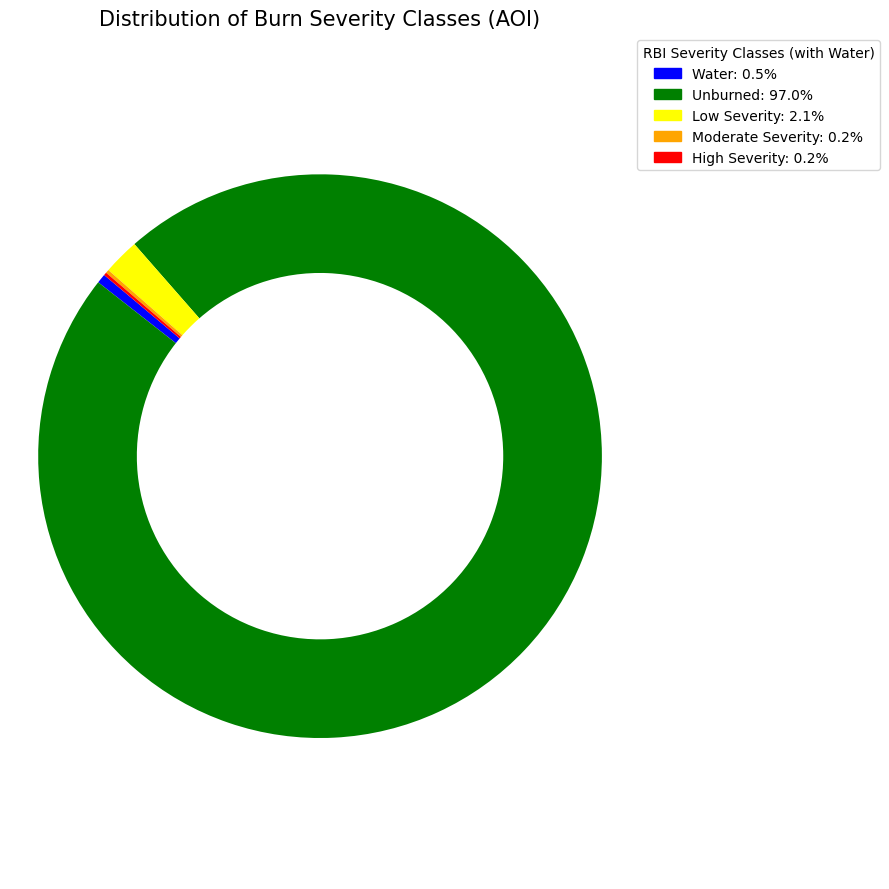

In [ ]:

# === Colab cell: RBIclass area stats + pie chart ===
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ee

# 1) Initialize Earth Engine (safe if already authenticated/initialized)
try:
    ee.Initialize()
except Exception as e:
    # Fallback in case the notebook hasn't authenticated yet
    ee.Authenticate()
    ee.Initialize(project = 'nana-477607')

# 2) Validate required variables from previous cells
# Expect: 'aoi' (ee.Geometry or ee.FeatureCollection with geometry) and 'burn_severity_with_water' (ee.Image) - now using rbi_class
# burn_severity_with_water should have class values: 0=Water, 1=Unburned/No-Low, 2=Low, 3=Moderate, 4=High
if 'aoi' not in globals():
    raise ValueError("Missing 'aoi' in the notebook. Please define the AOI earlier or add it to this cell.")
# Check for rbi_class instead of burn_severity_with_water
if 'rbi_class' not in globals():
    raise ValueError("Missing 'rbi_class' image. Run the cell that creates it before this one.")

# If 'aoi' is a FeatureCollection, get its geometry
if isinstance(aoi, ee.featurecollection.FeatureCollection):
    aoi = aoi.geometry()

# 3) Class labeling and color mapping
class_labels = {
    0: 'Water',
    1: 'Unburned',           # or 'No/Low Severity' if that matches your legend
    2: 'Low Severity',
    3: 'Moderate Severity',
    4: 'High Severity'
}
# Colors aligned with your map legend
class_colors = {
    0: 'blue',
    1: 'green',
    2: 'yellow',
    3: 'orange',
    4: 'red'
}

# 4) Area computation
pixel_area = ee.Image.pixelArea()  # band name: 'area' (m^2)
scale_m = 10                       # Sentinel-2 resolution for visible/NIR bands

class_areas_sqm = {}  # areas in square meters

for class_id in sorted(class_labels.keys()):
    class_mask = rbi_class.eq(class_id)
    # Mask pixel_area with the class mask and reduce over AOI
    try:
        reduce_dict = pixel_area.updateMask(class_mask).reduceRegion(
            reducer=ee.Reducer.sum(),
            geometry=aoi,
            scale=scale_m,
            maxPixels=2e9,      # generous maxPixels for larger AOIs
            bestEffort=True     # helps avoid failures on very large regions
        )
        area_m2 = reduce_dict.get('area').getInfo()
    except Exception as e:
        area_m2 = None

    class_areas_sqm[class_id] = float(area_m2) if area_m2 is not None else 0.0

# 5) Convert to hectares and square kilometers
class_areas_ha = {class_labels[c]: class_areas_sqm[c] / 10_000 for c in class_labels}
class_areas_sqkm = {class_labels[c]: class_areas_sqm[c] / 1_000_000 for c in class_labels}

# 6) Print summary
print("Area coverage for each class (square meters):")
for c in sorted(class_labels):
    print(f"{class_labels[c]}: {class_areas_sqm[c]:,.2f} m²")

print("\nArea coverage for each class (hectares):")
for label in class_areas_ha:
    print(f"{label}: {class_areas_ha[label]:,.2f} ha")

print("\nArea coverage for each class (square kilometers):")
for label in class_areas_sqkm:
    print(f"{label}: {class_areas_sqkm[label]:,.2f} km²")

# 7) Pie chart
# Prepare areas in plotting order 0..4
areas_plot = [class_areas_sqm[c] for c in sorted(class_labels)]
total_area = sum(areas_plot)

# Handle the degenerate case where all areas are zero
if total_area == 0:
    print("\nWarning: Total area is zero; pie chart will be empty. Check AOI/image classes and scale.")
    total_area = 1e-9

colors_plot = [class_colors[c] for c in sorted(class_labels)]

plt.figure(figsize=(9, 9))
wedges, texts = plt.pie(
    areas_plot,
    colors=colors_plot,
    startangle=140,
    wedgeprops=dict(width=0.35)
)

# Custom legend including percentages
legend_handles = []
legend_labels = []
for i, c in enumerate(sorted(class_labels.keys())):
    pct = (areas_plot[i] / total_area) * 100
    label_text = f"{class_labels[c]}: {pct:.1f}%"
    legend_handles.append(mpatches.Patch(color=class_colors[c], label=label_text))
    legend_labels.append(label_text)

plt.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='upper left',
    bbox_to_anchor=(1, 1),
    title='RBI Severity Classes (with Water)'
)

plt.title('Distribution of Burn Severity Classes (AOI)', fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.show()


#**5.0 DISCUSSION**

The false colour composite identified the type of vegetation health and density, these coupled with other environmental factors like wind explained why the firespread was controlled and didn't spread widely to other regions.

Before the event, the presence of vegetation revealed VV polarization backscatter was less (dominant at ~ -25) and after fire the backscatter was positive (+5) which indicate sureface roughness as signal scattters in different direction and some received back at the sensor. The cross polarization (VH) before fire, the backscatter was more (VH dominant at -10 to ~ -5) while after the fire, cross polarization (VH dominant at -25) which implies less backscatter recieved horizonatlly and there was vegetation loss.

The radar burn index quantify the extend of the burn severity (high 0.2%), moderate burn (0.2%), low burn (2.1%) and 97% as unburn with 0.% water mass. from the above statistics and aerial view of fire occurance, the extent of the burn was predominantly on a limestone soil with scrubland vegetation not dense but a sparse vegetation.


# **6.0 CONCLUSION**

The total hectares of AOI 243,873.66, the total hectares of land damaged as a result of the fire was (5,955.96), total land area coverved by water was 1,296.61. The use of sentinel-1 SAR is important for to understand surface characteristics such as terrain roughness, moisture content. For good fire analysis, VV and VH is better to use because fire affect vegetation and soil and combination of VH and VV gives a complete insight on soil surface roughness cahnges, VH gives insight on vegetation structure changes. the structural changes and surface changes improves accuracy of mapping burn severity especially in a mixed landscape.




#**CHALLENGES**


1.   USGS classification was done using dNBR, to get the radar burn index, the code had to overlay the change in VH with dNBR to get the radar burn index.





**ANNEX**



1.  VV - vertical transmission vertical recieve
2.  VH - dertical transmission horizontal recieve

3.  RBI - Radar burn index
4.  dNBR - Normalised burn ratio
5.  USGS - United State geological survey
6.  AOI - Area of Interest









# **BIBILOGRAPHY**

Filipponi, F. (2019). Sentinel‑1 GRD preprocessing workflow. Proceedings, 18(1), 11. https://doi.org/10.3390/ECRS-3-06201 [mdpi.com]
France 24. (2025, August 7). France's largest wildfire in decades brought under control. Retrieved from https://www.france24.com/en/france/20250807-under-control-french-firefighters-contain-largest-wildfire-in-decades [france24.com].

Hansen, K. (2025, August 6). Wildfire Sweeps Through Southern France. NASA Earth Observatory. Retrieved from https://earthobservatory.nasa.gov/images/154654/wildfire-sweeps-through-southern-france [earthobser...y.nasa.gov].

Helsinki Times. (2025, August 7). France faces worst wildfire in nearly 80 years. Retrieved from https://www.helsinkitimes.fi/world-int/27616-france-faces-worst-wildfire-in-nearly-80-years.html [helsinkitimes.fi].

RFI. (2025, August 7). Biggest French wildfire since 1949 a 'catastrophe on an unprecedented scale'. Retrieved from https://www.rfi.fr/en/france/20250807-biggest-french-wildfire-since-1949-a-catastrophe-on-an-unprecedented-scale [rfi.fr].

Speck, E. (2025, August 7). France’s deadly wildfire, largest in 70 years, contained. Fox Weather. Retrieved from https://www.foxweather.com/extreme-weather/france-aude-fire-death-drought [foxweather.com].

Tanase, M. A., Kennedy, R. E., & Aponte, C. (2015). Fire severity estimation from space: A comparison of active and passive sensors and their synergy for different forest types. International Journal of Wildland Fire, 24(8), 1062–1075. https://doi.org/10.1071/WF15059

The Independent. (2025, August 9). Firefighters battle to prevent reignition of France’s largest wildfire as residents return home. Retrieved from https://www.independent.co.uk/news/france-paris-scientists-southern-europe-b2804794.html [independent.co.uk].


## References

1. ee (Google Earth Engine Python API).
2. geemap (A Python package for interactive mapping with Google Earth Engine).
3. folium (Used for creating interactive maps, often installed with geemap).
4. geopandas (For working with geospatial data).
5. shapely (For geometric objects and operations, often a dependency of geopandas).
6. rasterio (For reading and writing raster datasets).
7. sentinelsat (For searching and downloading Sentinel satellite products).
8. matplotlib (For creating static, interactive, and animated visualizations in Python).
9. cartopy (For cartographic projections and drawing maps, often used with matplotlib).
10. pandas (For data manipulation and analysis).
11. seaborn (For statistical data visualization, built on matplotlib).

Additionally, the computational framework was developed using a combination of publicly available scripts and AI-assisted code refinement. The foundational code for accessing and processing Sentinel-1 SAR and Sentinel-2 multispectral imagery was sourced from the Google Earth Engine (GEE) dataset catalog. Microsoft Copilot and Google Gemini were also consulted during the code adaptation process.